In [3]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append(f'E:\gitlab\custom-script\script')
from ursar import time_series

%reload_ext autoreload

# Load dataset

In [4]:
df = pd.read_csv(f"E:/gitlab/machine-learning/dataset/dummy_topup_data.csv", sep=",", index_col=None)

In [5]:
df

,datetime,sum_amount,avg_amount_per_user,anomaly
0,2017-05-16 00:10:00,26.323942,16.474923,False
1,2017-05-16 00:40:00,25.363050,15.325484,False
2,2017-05-16 01:10:00,25.443192,11.128038,False
3,2017-05-16 01:40:00,26.149407,10.833380,False
4,2017-05-16 02:10:00,25.801580,10.858455,False
...,...,...,...,...
12269,2018-01-26 14:40:00,26.103956,13.934151,False
12270,2018-01-26 15:10:00,26.499405,14.409160,False
12271,2018-01-26 15:40:00,26.380532,14.416234,False
12272,2018-01-26 16:10:00,26.207231,14.174578,False


# Convert datetime column to pandas.datetime dtype and setting it as the index of the dataframe

In [6]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime').sort_index()

# moving average

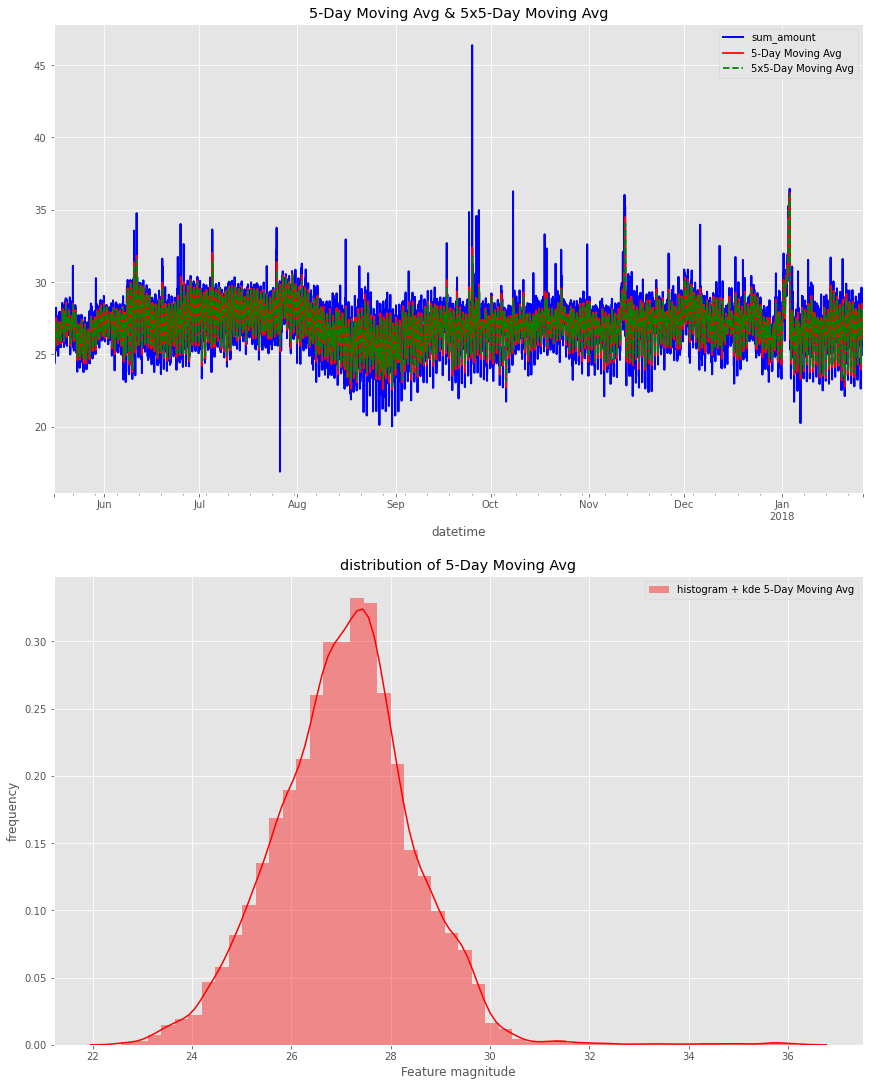

In [10]:
time_series.moving_average(df,"sum_amount",5,bins=50,show_mxm=True)

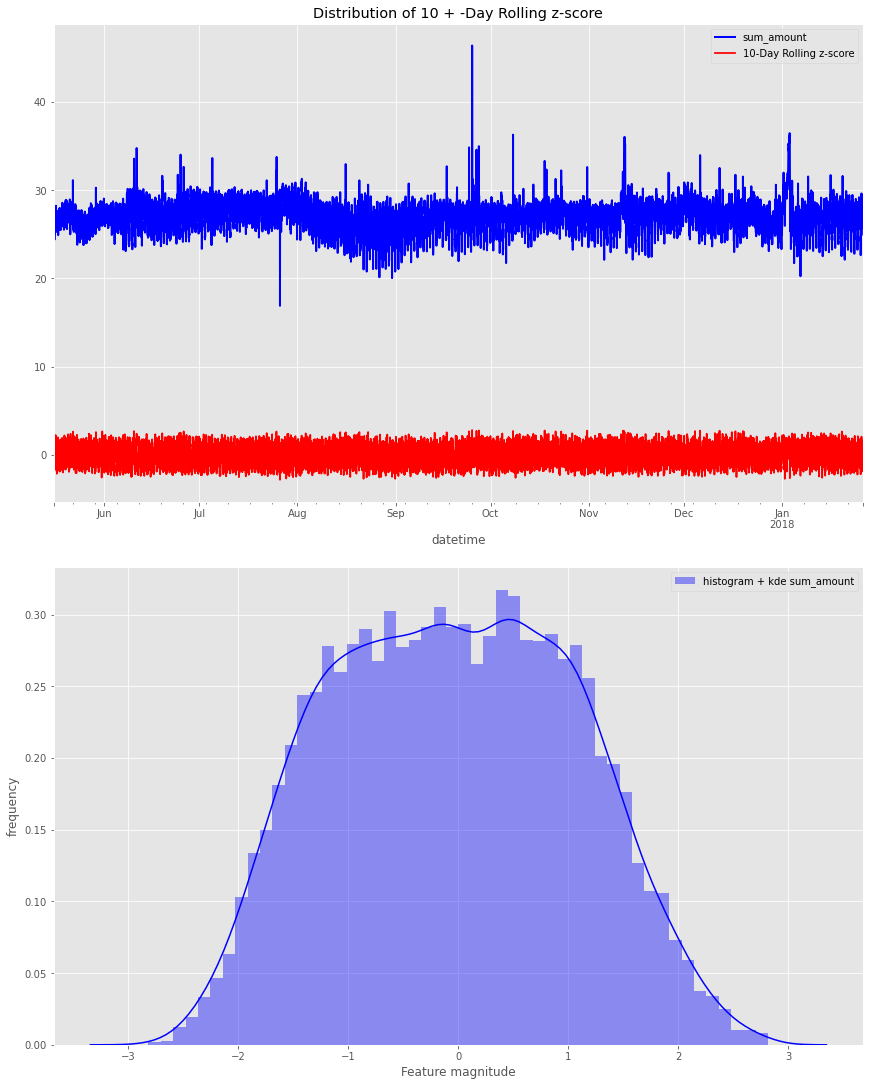

In [11]:
time_series.z_score(df,"sum_amount",10,bins=50)

In [20]:
df

,sum_amount,avg_amount_per_user,anomaly,5-Day Moving Avg,5x5-Day Moving Avg,10-Day Rolling z-score
datetime,,,,,,
2017-05-16 00:10:00,26.323942,16.474923,False,25.816234,25.816234,0.370560
2017-05-16 00:40:00,25.363050,15.325484,False,25.816234,25.816234,0.370560
2017-05-16 01:10:00,25.443192,11.128038,False,25.816234,25.816234,0.370560
2017-05-16 01:40:00,26.149407,10.833380,False,25.816234,25.816234,0.370560
2017-05-16 02:10:00,25.801580,10.858455,False,25.816234,25.816234,0.370560
...,...,...,...,...,...,...
2018-01-26 14:40:00,26.103956,13.934151,False,26.931094,27.334602,-1.522015
2018-01-26 15:10:00,26.499405,14.409160,False,26.912292,27.203405,-0.865601
2018-01-26 15:40:00,26.380532,14.416234,False,26.544841,27.013961,-0.856319


# Decomposition plot

In [25]:
# Load dataset
df = pd.read_csv(f'E:\gitlab\machine-learning\dataset\RestaurantVisitors.csv',index_col='date',parse_dates=True)
df.index.freq = 'D'
df = df.dropna()

In [34]:
df

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0


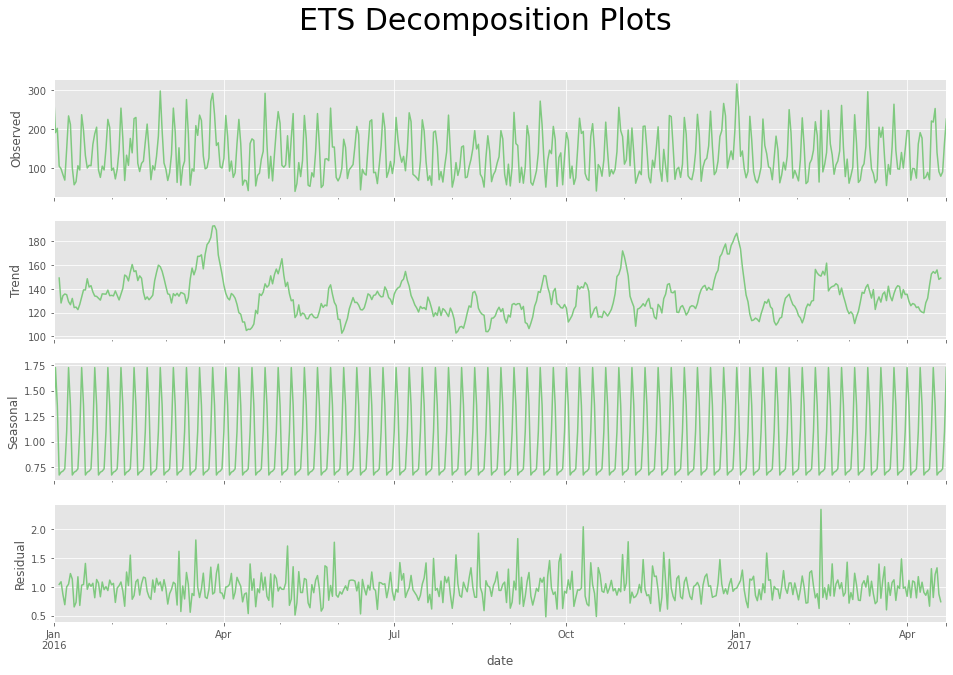

In [27]:
time_series.decomposition_plot(df,'total','multiplicative')

### Run ADF test to check if data is stationary 

In [31]:
adf_result,adf = time_series.adf_test(df,'total',autolag='AIC')

Augmented Dickey-Fuller Test:

p-val of the ADF test in dataset: 1.319377094694142e-06
Augmented Dickey-Fuller Test on Sales Data

ADF test statistic       -5.592497
p-value                   0.000001
#lags used               18.000000
#observations           459.000000
critical value (1%)      -3.444677
critical value (5%)      -2.867857
critical value (10%)     -2.570135

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


# KPSS (Kwiatkowski-Phillips-Schmidt-Shin) Test for stationarity

In [68]:
time_series.kpss_test(df,'total')

Results of KPSS Test:
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


,params,value
0,Test Statistic,0.202363
1,p-value,0.100000
2,Lags Used,18.000000
3,Critical Value (%s) 10%,0.347000
4,Critical Value (%s) 5%,0.463000
5,Critical Value (%s) 2.5%,0.574000
6,Critical Value (%s) 1%,0.739000


# ljungbox test

In [40]:
time_series.ljungbox_test(df,'total',10)


Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 0 for p-val = 6.862706191449071e-16

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 1 for p-val = 1.1727714599396097e-18

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 2 for p-val = 1.642497424909801e-33

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 3 for p-val = 1.6780120291192818e-49

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 4 for p-val = 3.5650935135020006e-54

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 5 for p-val = 2.1926348643907715e-64

Strong evidence against the null hypothesis
Reject the null hypothesis
Null hypothesis is rejected at lag = 6 for p-val = 4.9

### Plot ACF and PACF Plots to get idea of orders

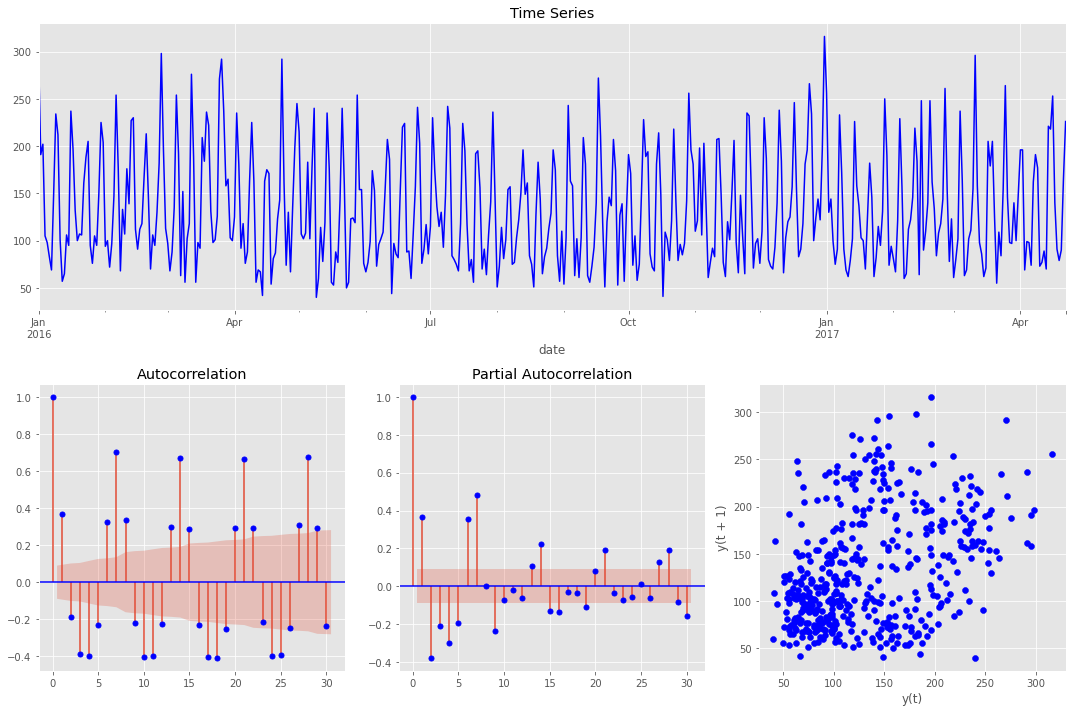

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  478
Model:                     ARMA(1, 0)   Log Likelihood               -2674.748
Method:                           mle   S.D. of innovations             65.042
Date:                Tue, 10 Aug 2021   AIC                           5353.496
Time:                        11:24:47   BIC                           5361.836
Sample:                             0   HQIC                          5356.775
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1.y        0.9002      0.020     44.487      0.000       0.861       0.940
                                    Roots                                    
                  Real          Imaginary           M

In [36]:
ar1 = time_series.autocorrelation_plot(df,'total',30)

# auto arima

In [41]:
time_series.autoarima(df,'total',7)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2380.595
Date:                   Tue, 10 Aug 2021   AIC                           4769.191
Time:                           13:30:15   BIC                           4785.869
Sample:                                0   HQIC                          4775.748
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.7053      1.456      2.545      0.011       0.852       6.559
ar.S.L7        0.9697      0.011     86.031      0.000       0.948       0.992
ma.S.L7       -0.7627      0.048    -15.985      0.000      -0.856      -0.669
sigma2      1201.1092     70.235     17.101      0.000    1063.452    1338.767
===================================================================================
Ljung-Box (Q):                       64.84   Jarque-Bera (JB):                67.41
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.75
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# timeseries plot

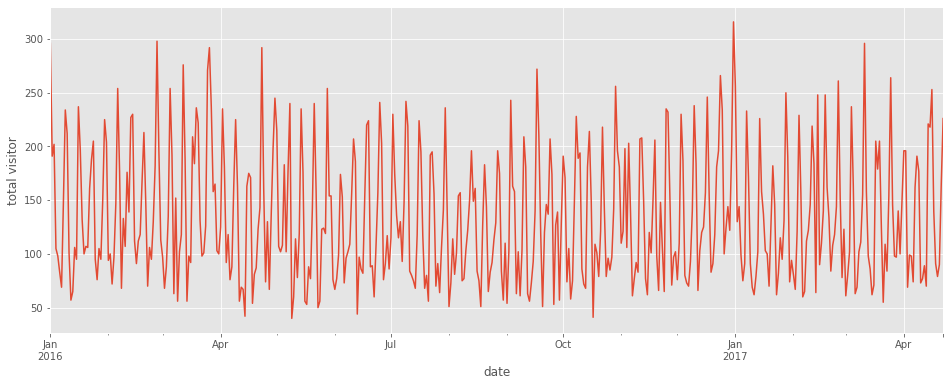

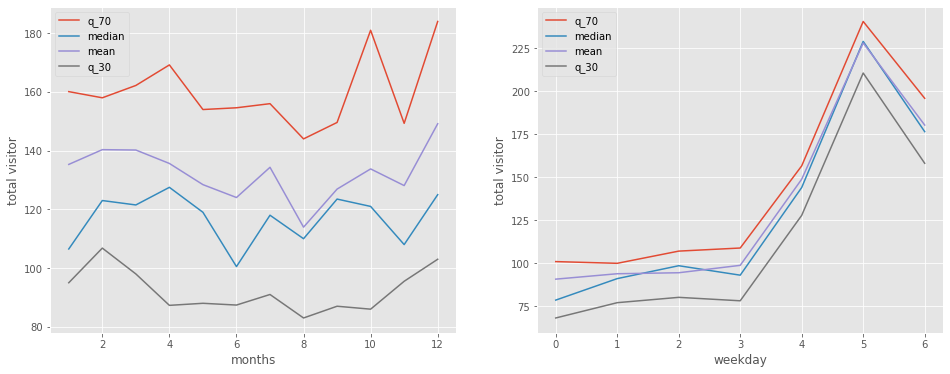

In [52]:
time_series.timeseries_plot(df,'total','total visitor')

In [54]:
time_series.plot_dates_values(df.index, df['total'],'total visitor')